First step is to import relevant data from external source

In [1]:
import os
import tarfile
import urllib

DOWNLOAD_PATH = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/'
HOUSING_PATH = os.path.join('datasets','housing')
HOUSING_URL = DOWNLOAD_PATH + 'datasets/housing/housing.tgz'

def feach_housing_data(housing_url, housing_path):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path =os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
import pandas as pd

def load_data(housing_path):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [3]:
feach_housing_data(HOUSING_URL, HOUSING_PATH)
housing = load_data(HOUSING_PATH)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
#housing.hist(bins=50, figsize=(20,15))

In [8]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2) 

In [9]:
print(len(train_set))
print(len(test_set))

16512
4128


In [10]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)
len(train_set)
len(test_set)

4128

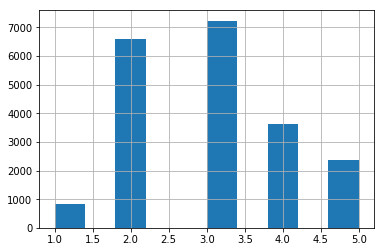

In [12]:
housing['income_cat'] = pd.cut(housing['median_income'],
                                    bins=[0., 1.5 , 3.0, 4.5, 6., np.inf],
                                    labels=[1,2,3,4,5])
housing['income_cat'].hist()

In [13]:
import sklearn
from sklearn.model_selection import StratifiedShuffleSplit
housing['income_cat'].head()

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index] 

TypeError: object of type 'CategoricalDtype' has no len()

In [14]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

NameError: name 'strat_test_set' is not defined

In [15]:
strat_test_set['income_cat'].value_counts()

NameError: name 'strat_test_set' is not defined

In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

NameError: name 'strat_train_set' is not defined

In [17]:
housing = strat_train_set.copy()
housing.columns

NameError: name 'strat_train_set' is not defined

In [18]:
#housing.plot(kind='scatter', x='longitude', y='latitude')

In [19]:
#housing.plot(kind='scatter', x = 'longitude', y='latitude', alpha=0.1)

In [20]:
#housing.plot(kind='scatter', x = 'longitude', y='latitude', alpha=0.4, s=housing['population']/100, label='population',
#figsize=(10,7), c="median_house_value", cmap=plt.get_cmap('jet'), colorbar=True,)
#plt.show()

In [21]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
#scatter_matrix(housing[attributes],figsize=(12,8))

In [22]:
housing.columns
housing['rooms_per_households'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_households'] = housing['population']/housing['households']

In [23]:
strat_test_set.columns
housing = strat_test_set.drop('median_house_value', axis =1)
housing_labels = strat_train_set['median_house_value'].copy()
print(housing_labels)

NameError: name 'strat_test_set' is not defined

In [24]:
housing.dropna(subset=['total_bedrooms'])
housing.drop('total_bedrooms', axis=1)
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace = True)

In [27]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis = 1)
housing_num.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_households,bedrooms_per_room,population_per_households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,6.281853,0.172096,2.181467


In [35]:
from sklearn.preprocessing import OrdinalEncoder

housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.],
       [ 3.]])

In [40]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_ihot_cat = cat_encoder.fit_transform(housing_cat)
housing_ihot_cat
housing_ihot_cat.toarray()
cat_encoder.categories_

AttributeError: 'OneHotEncoder' object has no attribute 'cat_'